In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data#Train.csv <br>
Os cientistas de dados da BigMart coletaram dados de vendas de 2013 para 1559 produtos em 10 lojas em diferentes cidades. Além disso, determinados atributos de cada produto e loja foram definidos. O objetivo é criar um modelo preditivo e descobrir as vendas de cada produto em uma determinada loja.

Usando este modelo, a BigMart tentará entender as propriedades de produtos e lojas que desempenham um papel fundamental no aumento das vendas.

# Importando e visualisando tabela

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


| Variavel | Descrição |
|--|--|
|Item_Identifier|ID único do produdo|
|Item_Weight|Peso do produto|
|Item_Fat_Content|Se o produto possui baixo teor de gorduta|
|Item_Visibility|A% da área de exibição total de todos os produtos em uma loja alocada para o produto específico|
|Item_Type|A categoria do produto|
|Item_MRP|Preço máximo de varejo(preço de tabela) do produto|
|Outlet_Identifier|ID único da loja|
|Outlet_Establishment_Year|O ano em que a loja foi estabelecida|
|Outlet_Size|O tamanho da loja em termos de área coberta|
|Outlet_Location_Type|O tipo de cidade em que a loja está localizada|
|Outlet_Type|Se a loja é apenas uma mercearia ou um supermercado|
|Item_Outlet_Sales|Quantidade de vendas do produto na loja em particular. Variável a ser predita.|

In [4]:
df.shape

(8523, 12)

In [5]:
df.drop(labels='Item_Identifier', axis=1, inplace=True)

# Verificando dados faltantes e tipo de cada coluna

In [6]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


# Visualizando informações sobre nossos dados

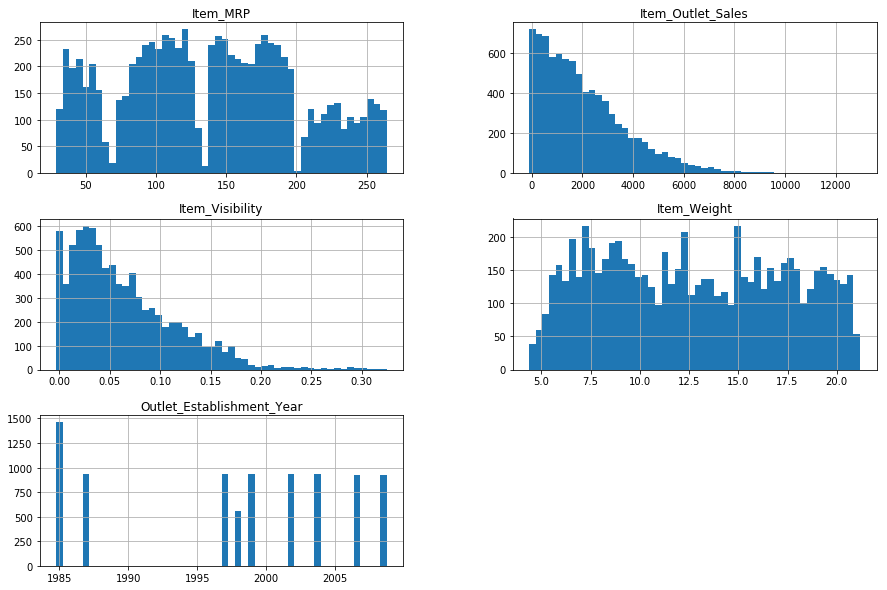

In [8]:
df.hist(bins=50, figsize=(15, 10), align='left');

In [9]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [10]:
categories = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 
              'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type']
numeric = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
target = 'Item_Outlet_Sales'
for column in categories:
    print(df[column].value_counts(), end='\n\n')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

1985    1463
1987     932
2004     930
1999     930
1997     930
2002     929
2009     928
2007     926
1998     5

In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [12]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


# Separando treino e teste

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=33)
train = train.copy()
test = test.copy()

In [14]:
train.shape, test.shape

((5966, 11), (2557, 11))

# Limpando dados

In [15]:
item_weight_mean = train['Item_Weight'].mean()

train['Item_Weight'].fillna(item_weight_mean, inplace=True)
train['Outlet_Size'].fillna("Unknown", inplace=True)

test['Item_Weight'].fillna(item_weight_mean, inplace=True)
test['Outlet_Size'].fillna("Unknown", inplace=True)

In [16]:
train.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
item_fat = lambda x: ((x == 'LF' or x == 'low fat') and 'Low Fat') or (x == 'reg' and 'Regular') or x

In [18]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].apply(item_fat)
test['Item_Fat_Content'] = test['Item_Fat_Content'].apply(item_fat)

In [19]:
train['Item_Fat_Content'].value_counts()

Low Fat    3853
Regular    2113
Name: Item_Fat_Content, dtype: int64

# Tratando os dados categoricos

In [20]:
train.shape, test.shape

((5966, 11), (2557, 11))

In [21]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [22]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
392,18.000,0.142689,88.5514,796.9626,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1993,5.820,0.077319,255.4330,4357.6610,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3916,7.155,0.168527,33.6874,1023.3346,1,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
1294,18.850,0.042642,257.8330,5382.9930,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
4526,13.850,0.034766,114.2492,1853.5872,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0


# Preparar dados para o algoritimo

In [23]:
X_train = train.drop(labels=target, axis=1).astype('float')
y_train = train[target]

X_test = test.drop(labels=target, axis=1).astype('float')
y_test = test[target]

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5966, 44), (5966,), (2557, 44), (2557,))

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<img src="https://cdncontribute.geeksforgeeks.org/wp-content/uploads/standardisation.jpg">

#### Histogramas da coluna Item_Visibility antes e depois da normalização

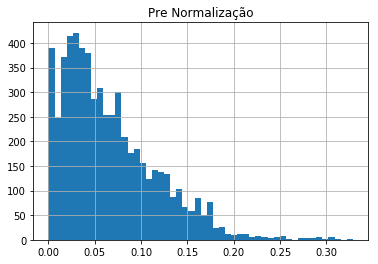

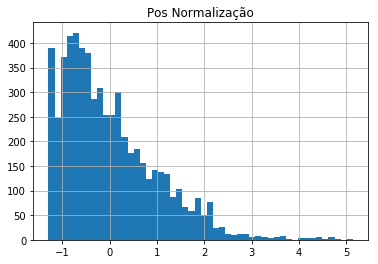

In [26]:
df2 = pd.DataFrame(X_train)
train['Item_Visibility'].hist(bins=50)
plt.title('Pre Normalização')
plt.show()
df2[1].hist(bins=50)
plt.title('Pos Normalização')
plt.show()

# Treinando o modelo de regressão linear

In [27]:
from sklearn.linear_model import LinearRegression

<img src="https://i.ytimg.com/vi/zPG4NjIkCjc/maxresdefault.jpg">

In [28]:
linear_clf = LinearRegression()
linear_clf.fit(X_train, y_train)
y_predict = linear_clf.predict(X_test)

# Medindo o desempenho do modelo

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
y_test.describe()

count    2557.000000
mean     2154.952444
std      1700.085063
min        33.290000
25%       814.939200
50%      1761.706800
75%      3010.747600
max      9678.068800
Name: Item_Outlet_Sales, dtype: float64

<img src="https://www.includehelp.com/ml-ai/Images/rmse-1.jpg">

In [31]:
print("RMSE treino:", np.sqrt(mean_squared_error(y_train, linear_clf.predict(X_train))))
print("RMSE teste:", np.sqrt(mean_squared_error(y_test, y_predict)))

RMSE treino: 1129.0450901467286
RMSE teste: 1125.1246948468543


## Coeficientes da hipótese

In [32]:
linear_clf.intercept_, linear_clf.coef_

(2192.3732558335005,
 array([-1.83294293e+01, -9.47879161e+00,  9.79046834e+02,  7.69311245e+00,
        -7.41429964e+00, -3.26179428e+00,  3.21433764e+00, -1.62108072e+01,
        -5.22128939e+00,  2.11033552e+01,  4.14067918e+00, -5.17421665e+00,
        -1.86306308e+01, -3.28183242e+00, -8.56076398e+00,  9.63834505e+00,
        -3.49266984e+00, -1.14489324e+01,  2.38034733e+01, -9.95345880e+13,
        -6.43071592e+14,  4.24472588e+14,  2.05863058e+15,  4.65029060e+14,
         1.39550183e+14, -1.38500337e+16,  1.76645720e+15, -2.88924244e+15,
        -9.09670339e+14,  2.83033307e+14,  5.44360045e+14,  2.99124702e+15,
         1.23422841e+16,  4.76562558e+14, -8.96489480e+14,  2.22118494e+14,
        -1.85068334e+15, -4.56906220e+15, -1.50992188e+15,  2.17132122e+15,
        -1.90232477e+14,  9.87775529e+14,  2.22000890e+14,  4.22102885e+14]))

In [33]:
sample = np.random.randint(0, X_test.shape[0])

In [34]:
np.dot(linear_clf.coef_, X_test[sample]) + linear_clf.intercept_

212.37325583350048

In [35]:
linear_clf.predict(X_test[sample].reshape(1, -1))

array([212.37325583])

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor

<img src="https://cdn-images-1.medium.com/max/800/1*H3nZElqhfOE35AFAq8gy0A.png">

In [37]:
tree_clf = DecisionTreeRegressor(max_depth=5)
tree_clf.fit(X_train, y_train)
y_predict = tree_clf.predict(X_test)

In [38]:
print("RMSE treino:", np.sqrt(mean_squared_error(y_train, tree_clf.predict(X_train))))
print("RMSE teste:", np.sqrt(mean_squared_error(y_test, y_predict)))

RMSE treino: 1058.8956875948438
RMSE teste: 1108.8322481314267


In [39]:
tree_clf.feature_importances_.round(2)

array([0.  , 0.  , 0.55, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.04])

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

<img src="https://c.mql5.com/2/33/image1__1.png">

In [41]:
forest_clf = RandomForestRegressor(n_estimators=50, max_depth=5)
forest_clf.fit(X_train, y_train)
y_predict = forest_clf.predict(X_test)

In [42]:
print("RMSE treino:", np.sqrt(mean_squared_error(y_train, forest_clf.predict(X_train))))
print("RMSE teste:", np.sqrt(mean_squared_error(y_test, y_predict)))

RMSE treino: 1057.9354331446466
RMSE teste: 1081.1995666841196


In [43]:
forest_clf.feature_importances_ 

array([9.86186646e-04, 5.82790551e-03, 5.53205265e-01, 2.81333977e-04,
       5.13293545e-04, 1.55003784e-05, 4.12395653e-05, 9.98538984e-05,
       1.16485603e-04, 5.74084211e-04, 1.28711875e-04, 2.28215681e-04,
       4.24345448e-04, 1.05043016e-05, 4.87291448e-05, 2.58226703e-06,
       7.54942778e-05, 3.03550779e-04, 5.47726145e-05, 0.00000000e+00,
       0.00000000e+00, 1.66158664e-02, 6.23971447e-02, 8.07521737e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.66668607e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.58050263e-03,
       2.70070728e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.50550239e-02, 9.51379984e-03, 6.94735011e-02])

Produzido por: Matheus Xavier Sampaio